In [1]:
import os
import pandas as pd
import emoji
import numpy as np
import re
import string
import enchant
import nltk 
import csv
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#Function for cleaning text of tweets
def clean_text(text):
    
    #Removing URL
    text = re.sub(r"http\S+", "", text)
    #Removing emoji/stickers
    text = re.sub(emoji.get_emoji_regexp(), r"", text)
    #Removing punctuation and tokenizing
    text_token = "".join([x.lower() for x in text if x not in punct]).split()
    #Removing stop words
    text_removed_sw = [x for x in text_token if x not in stop_words]
    #Lemmatizing and stemming
    cleaned_text = [stem.stem(x) if x.endswith("ing") else lemma.lemmatize(x) for x in  text_removed_sw]
    
    return cleaned_text

#Setting punctuation and stop words
punct = set(string.punctuation + "“—\u200b‘•’\u2060┉⊰\u2063”")
stop_words = set(stopwords.words('english') + ['us','all','hey','yeah','ya','yeap',"this"])

#Initializing lemmatizer and stemmer
lemma = nltk.WordNetLemmatizer()
stem = nltk.PorterStemmer()

directory = "raw_trending_topics\\" 

for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            print()
            print("-----------------------------------------")
            print()
            print("File no:", file)
            print()
            filename = root+ "\\" + file
            data = pd.read_csv(filename)
            data['cleaned'] = data['tweet'].apply(lambda x: clean_text(x))
            vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, max_features = 200)
            bag_of_words = vectorizer.fit_transform(data['cleaned'])
            bag_of_words = vectorizer.get_feature_names()
            bag_of_words= pd.DataFrame(bag_of_words,  columns =['word'])
            
            #saving cleaned data to csv
            filename = "bag_of_words/" + file
            bag_of_words.to_csv(filename, index=False)


-----------------------------------------

File no: topic_1.csv


-----------------------------------------

File no: topic_10.csv


-----------------------------------------

File no: topic_100.csv


-----------------------------------------

File no: topic_11.csv


-----------------------------------------

File no: topic_12.csv


-----------------------------------------

File no: topic_13.csv


-----------------------------------------

File no: topic_14.csv


-----------------------------------------

File no: topic_15.csv


-----------------------------------------

File no: topic_16.csv


-----------------------------------------

File no: topic_17.csv


-----------------------------------------

File no: topic_18.csv


-----------------------------------------

File no: topic_19.csv


-----------------------------------------

File no: topic_2.csv


-----------------------------------------

File no: topic_20.csv


-----------------------------------------

File no: topic_21.c

# Word cloud

In [3]:
import os
import pandas as pd
import emoji
import numpy as np
import re
import string
import enchant
import nltk 
import csv
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [4]:
#Function for cleaning text of tweets
def clean_text(text):
    
    #Removing URL
    text = re.sub(r"http\S+", "", text)
    #Removing emoji/stickers
    text = re.sub(emoji.get_emoji_regexp(), r"", text)
    #Removing punctuation and tokenizing
    text_token = "".join([x.lower() for x in text if x not in punct]).split()
    #Removing stop words
    text_removed_sw = [x for x in text_token if x not in stop_words]
    #Lemmatizing and stemming
    cleaned_text = [stem.stem(x) if x.endswith("ing") else lemma.lemmatize(x) for x in  text_removed_sw]
    
    return cleaned_text

#Setting punctuation and stop words
punct = set(string.punctuation + "“—\u200b‘•’\u2060┉⊰\u2063”")
stop_words = set(stopwords.words('english') + ['us','all','hey','yeah','ya','yeap',"this"])

#Initializing lemmatizer and stemmer
lemma = nltk.WordNetLemmatizer()
stem = nltk.PorterStemmer()


In [5]:
directory = "raw_trending_topics\\" 
data = pd.read_csv(directory + 'topic_1.csv')
data['cleaned'] = data['tweet'].apply(lambda x: clean_text(x))
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, max_features = 200)
bag_of_words = vectorizer.fit_transform(data['cleaned'])
bow = vectorizer.get_feature_names()
count = bag_of_words.toarray().sum(axis=0)
words_count = pd.DataFrame(
    {'words': bow,
     'count': count,
    })
words_count = dict(zip(words_count['words'].tolist(), words_count['count'].tolist()))

In [6]:
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(words_count)

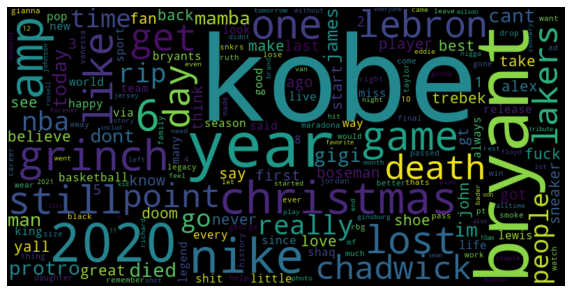

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
folder = "figures\\"
plt.savefig(folder+"wordcloud_topic_1.png",bbox_inches='tight')
plt.show()